In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl
from sklearn.preprocessing import LabelEncoder

# import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Data Analyst -- Case Study -- Data.csv')
df


,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
140,EW2,2021-11-04,1490
141,EW2,2021-11-05,1067
142,EW2,2021-11-06,1591
143,EW2,2021-11-07,1696


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


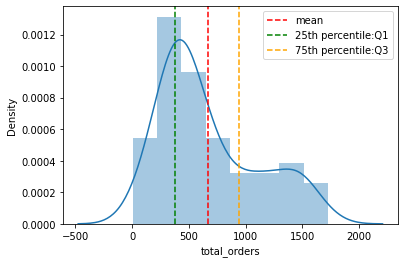

In [4]:
sns.distplot(df['total_orders'])
plt.axvline(x=np.mean(df['total_orders']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['total_orders'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['total_orders'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

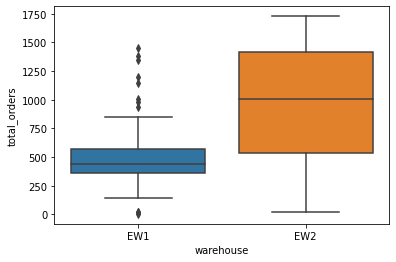

In [5]:
sns.boxplot(x=df['warehouse'], y=df['total_orders'])

In [7]:
#Create a new Column named 'Month' 
df['Month'] = df['date'].str[5:7]
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
df['weeknumber'] = df['date'].dt.week
df
# df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,warehouse,date,total_orders,Month,weekday,weeknumber
0,EW1,2021-08-10,455,08,Tuesday,32
1,EW1,2021-08-11,553,08,Wednesday,32
2,EW1,2021-08-12,569,08,Thursday,32
3,EW1,2021-08-13,426,08,Friday,32
4,EW1,2021-08-14,536,08,Saturday,32
...,...,...,...,...,...,...
140,EW2,2021-11-04,1490,11,Thursday,44
141,EW2,2021-11-05,1067,11,Friday,44
142,EW2,2021-11-06,1591,11,Saturday,44
143,EW2,2021-11-07,1696,11,Sunday,44


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


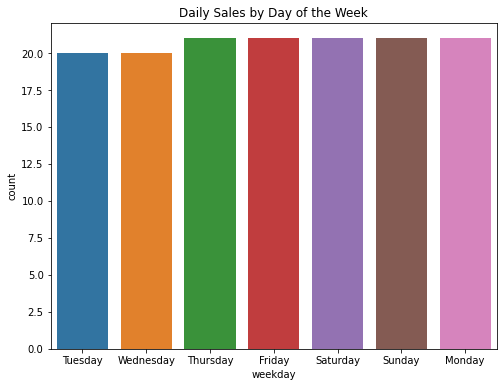

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['weekday'])



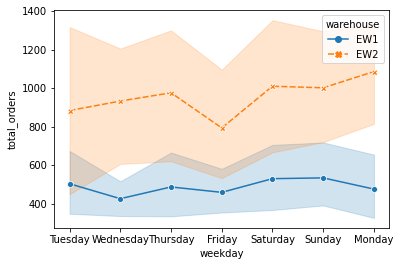

In [9]:
sns.lineplot(data=df, x="weekday", y="total_orders", hue="warehouse",style="warehouse", markers=True)

In [10]:
ans_df = df.groupby('Month').sum()
ans_df

,total_orders,weeknumber
Month,,
08,12430,698
09,21125,1715
10,47652,2558
11,15325,706


In [11]:
new_df = df.groupby(['warehouse', 'Month']).sum()
new_df

total_orders  weeknumber
warehouse Month                          
EW1       08            12430         698
          09            15016        1108
          10            13138        1279
          11             3379         353
EW2       09             6109         607
          10            34514        1279
          11            11946         353

In [21]:
new = new_df.groupby('warehouse').sum()
new

,total_orders,weeknumber
warehouse,,
EW1,43963,3438
EW2,52569,2239


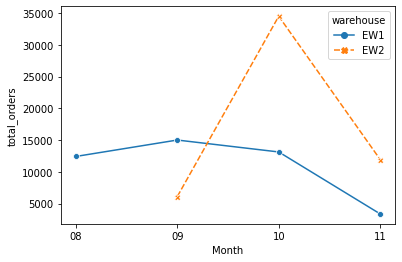

In [12]:
# fig, ax = plt.subplots()
# for label, grp in df.groupby('warehouse'):
#     grp.plot(x ='Month', y = df.groupby('Month').sum(),ax = ax, label = label)

sns.lineplot(data=new_df, x="Month", y="total_orders", hue="warehouse",style="warehouse", markers=True)

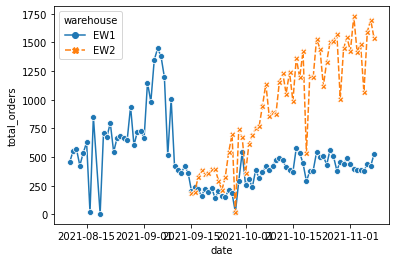

In [13]:
sns.lineplot(data=df, x="date", y="total_orders", hue="warehouse",style="warehouse", markers=True)

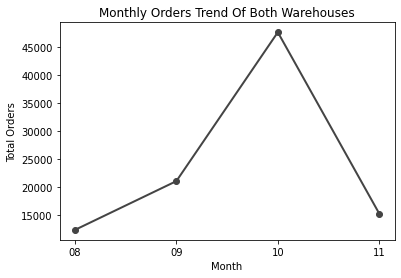

In [14]:
# plt.style.use('fivethirtyeight')


month = ans_df.index
sales = ans_df['total_orders']



plt.plot(month, sales, color="#444444", linewidth=2, marker='o')

plt.title('Monthly Orders Trend Of Both Warehouses')
plt.xlabel('Month')
plt.ylabel('Total Orders')

plt.show()

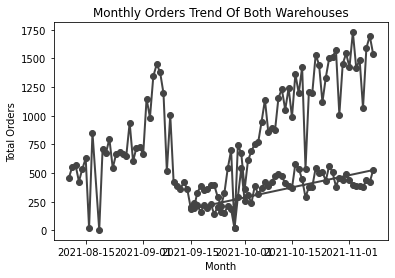

In [15]:


month = df['date']
sales = df['total_orders']



plt.plot(month, sales, color="#444444", linewidth=2, marker='o')

plt.title('Monthly Orders Trend Of Both Warehouses')
plt.xlabel('Month')
plt.ylabel('Total Orders')

plt.show()

In [16]:
le = LabelEncoder()
encoded_position = le.fit_transform(df['weekday'])
df['encoded_position'] = encoded_position
print(df)

corr = df.corr()
corr

    warehouse       date  total_orders Month    weekday  weeknumber  \
0         EW1 2021-08-10           455    08    Tuesday          32   
1         EW1 2021-08-11           553    08  Wednesday          32   
2         EW1 2021-08-12           569    08   Thursday          32   
3         EW1 2021-08-13           426    08     Friday          32   
4         EW1 2021-08-14           536    08   Saturday          32   
..        ...        ...           ...   ...        ...         ...   
140       EW2 2021-11-04          1490    11   Thursday          44   
141       EW2 2021-11-05          1067    11     Friday          44   
142       EW2 2021-11-06          1591    11   Saturday          44   
143       EW2 2021-11-07          1696    11     Sunday          44   
144       EW2 2021-11-08          1537    11     Monday          45   

     encoded_position  
0                   5  
1                   6  
2                   4  
3                   0  
4                   2  
.. 

,total_orders,weeknumber,encoded_position
total_orders,1.000000,0.297084,-0.008049
weeknumber,0.297084,1.000000,-0.019126
encoded_position,-0.008049,-0.019126,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


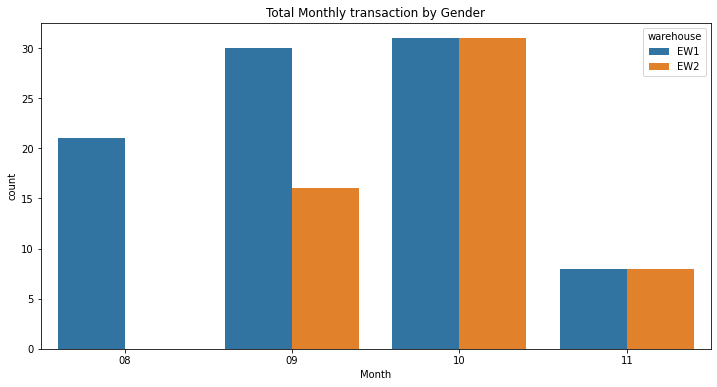

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Month'], hue = df.warehouse)

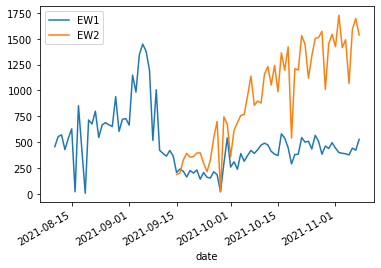

In [18]:
fig, ax = plt.subplots()
for label, grp in df.groupby('warehouse'):
    grp.plot(x = 'date', y = 'total_orders',ax = ax, label = label)

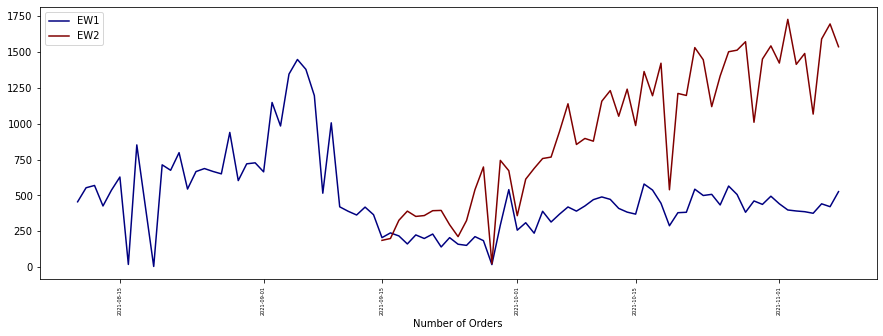

In [19]:
# import matplotlib.pylab as pl
# import matplotlib.pyplot as plt

labels = set(df['warehouse'].values)
colors = pl.cm.jet(np.linspace(0,1,len(labels)))
for key, color in zip(labels, range(len(labels))):
    data_x = df.loc[df['warehouse']==key]['date']
    data_y = df.loc[df['warehouse']==key]['total_orders']
    plt.rcParams["figure.figsize"] = (15,5)
    plt.xticks(rotation=90)
    # changing the fontsize of yticks
    plt.xticks(fontsize=5)
    plt.xlabel("Dates")
    plt.xlabel("Number of Orders")
    plt.plot(data_x, data_y, color=colors[color], label=key)

plt.legend()
plt.show()